<a href="https://colab.research.google.com/github/NavinAnto-03/AI-Projects/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training model for letters...
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


694/694 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.6505 - loss: 1.2325 - val_accuracy: 0.8322 - val_loss: 0.5474
Epoch 2/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8609 - loss: 0.4514 - val_accuracy: 0.8648 - val_loss: 0.4329
Epoch 3/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8923 - loss: 0.3442 - val_accuracy: 0.8791 - val_loss: 0.3898
Epoch 4/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9074 - loss: 0.2888 - val_accuracy: 0.8835 - val_loss: 0.3736
Epoch 5/5
694/694 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9179 - loss: 0.2509 - val_accuracy: 0.8839 - val_loss: 0.3718
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8863 - loss: 0.3644

Test Accuracy (Letters): 0.8838513493537903

Training model for digits...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 23ms/step - accuracy: 0.9351 - loss: 0.2262 - val_accuracy: 0.9819 - val_loss: 0.0608
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 13ms/step - accuracy: 0.9841 - loss: 0.

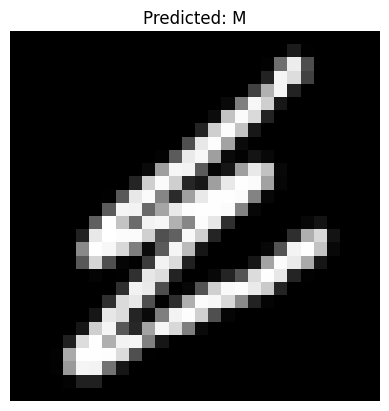


Example predictions for digits:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


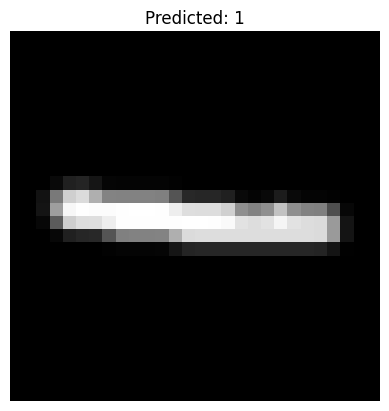

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow_datasets as tfds

(ds_train_letters, ds_test_letters), ds_info_letters = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

(ds_train_digits, ds_test_digits), ds_info_digits = tfds.load(
    'emnist/digits',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def preprocess_letters(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.squeeze(label) - 1
    label = tf.one_hot(label, 26)
    return image, label

def preprocess_digits(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, 10)
    return image, label

ds_train_letters = ds_train_letters.map(preprocess_letters)
ds_test_letters = ds_test_letters.map(preprocess_letters)

ds_train_digits = ds_train_digits.map(preprocess_digits)
ds_test_digits = ds_test_digits.map(preprocess_digits)

model_letters = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

model_letters.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Training model for letters...")
model_letters.fit(ds_train_letters.batch(128).prefetch(1), epochs=5, validation_data=ds_test_letters.batch(128).prefetch(1))

test_loss_letters, test_acc_letters = model_letters.evaluate(ds_test_letters.batch(128).prefetch(1))
print("\nTest Accuracy (Letters):", test_acc_letters)

model_digits = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_digits.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nTraining model for digits...")
model_digits.fit(ds_train_digits.batch(128).prefetch(1), epochs=5, validation_data=ds_test_digits.batch(128).prefetch(1))

test_loss_digits, test_acc_digits = model_digits.evaluate(ds_test_digits.batch(128).prefetch(1))
print("\nTest Accuracy (Digits):", test_acc_digits)

print("\nExample predictions for letters:")
for images, labels in ds_test_letters.take(1).batch(3):
    preds = model_letters.predict(images)
    for i, image in enumerate(images):
        plt.imshow(tf.squeeze(image), cmap='gray')
        predicted_label = chr(np.argmax(preds[i]) + 65)
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

print("\nExample predictions for digits:")
for images, labels in ds_test_digits.take(1).batch(3):
    preds = model_digits.predict(images)
    for i, image in enumerate(images):
        plt.imshow(tf.squeeze(image), cmap='gray')
        predicted_label = np.argmax(preds[i])
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

# Task
Upload the code from the current Colab notebook to a specified GitHub repository.

## Set up git in colab

### Subtask:
Install Git and configure your Git identity (username and email).


**Reasoning**:
The subtask requires installing and configuring Git. I will use shell commands to achieve this.



# Task
Train and evaluate two separate models using TensorFlow and Keras: one for classifying digits from the EMNIST digits dataset and another for classifying letters from the EMNIST letters dataset. After training, evaluate both models on their respective test sets and print the test accuracy. Finally, visualize the first 5 predictions of the letters model on the letters test set.

## Load emnist digits dataset

### Subtask:
Load the EMNIST digits dataset.


**Reasoning**:
The subtask is to load the EMNIST digits dataset. I will use the `tfds.load` function with the specified parameters to load the dataset and its information.

